In [211]:
using LinearAlgebra
using Plots

In [212]:
include("../../src/schemes/helmholtz.jl")

get_poisson_linsolve_A

In [213]:
function plot_case(M::Int, P::Int, alpha::Real, f::Function, domain, exact_u::Function)
    dx = (domain.x2 - domain.x1) / M

    xs = range(domain.x1 - dx, domain.x2, length=M+2)
    ys = range(domain.y1 - dx, domain.y2, length=P+2)

    u = sp_solve_modified_helmholtz(M, P, dx, f, alpha, domain)

    u_true = inflate(exact_u, xs, ys)

    # Plot the numerical solution vs exact solution.
    error = dx * norm(u - u_true)

    println(error)
    plot(xs, ys, [u, u_true], st=:surface, layout=(1, 2), size=(1000, 400))
end

plot_case (generic function with 1 method)

In [214]:
function testA(M::Int, P::Int, alpha::Float64, dx::Float64)
    D1 = spdiagm(M+1, M, -1 => -ones(M), 0 => ones(M))
    D2 = spdiagm(P+1, P, -1 => -ones(P), 0 => ones(P))
    A = kron(I(P), D1' * D1) + kron(D2' * D2, I(M)) - (alpha * (dx^2))*I(M*P)
    return A * 1 / (dx)^2
end

dx = (domain.x2 - domain.x1) / M
A_test = testA(M, P, alpha, dx)
display(Matrix(A_test))

900×900 Matrix{Float64}:
  400.0  -100.0     0.0     0.0     0.0  …     0.0     0.0     0.0     0.0
 -100.0   400.0  -100.0     0.0     0.0        0.0     0.0     0.0     0.0
    0.0  -100.0   400.0  -100.0     0.0        0.0     0.0     0.0     0.0
    0.0     0.0  -100.0   400.0  -100.0        0.0     0.0     0.0     0.0
    0.0     0.0     0.0  -100.0   400.0        0.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0  -100.0  …     0.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
    ⋮                                    ⋱                          
    0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
    0.

14.5003198585984


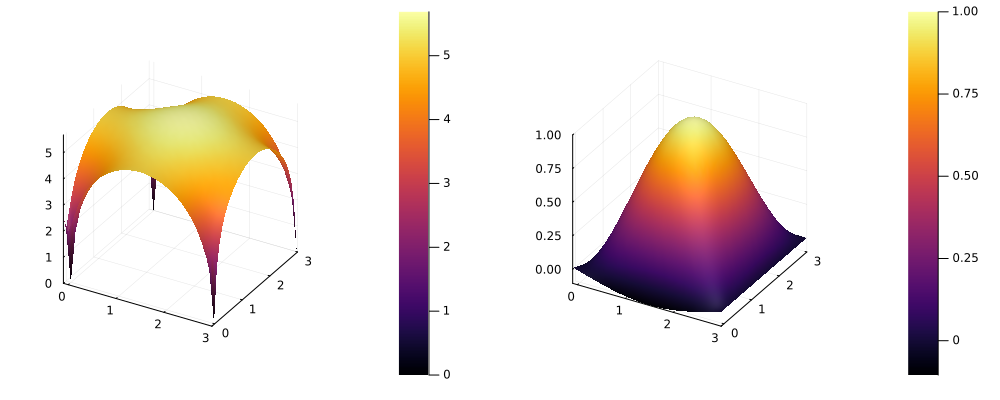

In [215]:
x_0 = 0
x_1 = 3
y_0 = 0
y_1 = 3
Lx = x_1 - x_0
Ly = y_1 - y_0

test_u(x, y) = sin(pi * (x - x_0) / Lx) * sin(pi * (y - y_0) / Ly)
test_f(x, y) = -pi^2*(new_test_u(x,y)*(1/Ly^2 + 1/Lx^2))

# test_u(x, y) = sin((pi/10) * x) * sin((pi/10) * y)
# test_f(x, y) = -(pi^2 / 50) * sin((pi/10) * x) * sin((pi/10) * y)

domain = RectangularDomain(x_0, x_1, y_0, y_1)
alpha = 0.0
M = P = 30

plot_case(M, P, alpha, test_f, domain, test_u)

In [107]:
test_u(x, y) = sin((pi/10) * x) * sin((pi/10) * y)
test_f(x, y) = -(pi^2 / 50) * sin((pi/10) * x) * sin((pi/10) * y)

domain = RectangularDomain(0, 10, 0, 10)
alpha = 0.0
M_list = P_list = [4, 8, 16, 32, 64]

for i in eachindex(M_list)
    M = M_list[i]
    P = P_list[i]

    dx = (domain.x2 - domain.x1) / M
    xs = range(domain.x1 - dx, domain.x2, length=M+2)
    ys = range(domain.y1 - dx, domain.y2, length=P+2)

    println(dx)
    println(xs)
    println(ys)
    
    f_matrix = inflate(test_f, xs, ys)
    u_true = inflate(test_u, xs, ys)
    
    u = sp_solve_modified_helmholtz(M, P, dx, f_matrix, alpha)
    error = dx * norm(u - u_true)

    plot()

    println("M = $M, Norm = $error")
end

36×36 Matrix{Float64}:
  0.64  -0.16   0.0    0.0    0.0   …   0.0    0.0    0.0    0.0    0.0
 -0.16   0.64  -0.16   0.0    0.0      -0.16   0.0    0.0    0.0    0.0
  0.0   -0.16   0.64  -0.16   0.0       0.0   -0.16   0.0    0.0    0.0
  0.0    0.0   -0.16   0.64  -0.16      0.0    0.0   -0.16   0.0    0.0
  0.0    0.0    0.0   -0.16   0.64      0.0    0.0    0.0   -0.16   0.0
 -0.16   0.0    0.0    0.0   -0.16  …   0.0    0.0    0.0    0.0   -0.16
 -0.16   0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
  0.0   -0.16   0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
  0.0    0.0   -0.16   0.0    0.0       0.0    0.0    0.0    0.0    0.0
  0.0    0.0    0.0   -0.16   0.0       0.0    0.0    0.0    0.0    0.0
  ⋮                                 ⋱                               ⋮
  0.0    0.0    0.0    0.0    0.0       0.0    0.0   -0.16   0.0    0.0
  0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0   -0.16   0.0
  0.0    0.0    0.0    0.0    0.0       0.

36-element Vector{Float64}:
  0.0
 -0.0
 -0.09869604401089355
 -0.13957728399277755
 -0.09869604401089357
 -1.7093287407543613e-17
 -0.0
  0.0
  0.0
  0.0
  ⋮
  0.13957728399277758
  0.09869604401089359
  1.7093287407543617e-17
 -1.7093287407543613e-17
  0.0
  1.7093287407543613e-17
  2.4173558877289422e-17
  1.7093287407543617e-17
  2.9604071503072577e-33

2.5
-2.5:2.5:10.0
-2.5:2.5:10.0
M = 4, Norm = 1.844369434891606e17
1.25
-1.25:1.25:10.0
-1.25:1.25:10.0
M = 8, Norm = 2.0184788092763572e16
0.625
-0.625:0.625:10.0
-0.625:0.625:10.0
M = 16, Norm = 2.857507759421666e16
0.3125
-0.3125:0.3125:10.0
-0.3125:0.3125:10.0
M = 32, Norm = 8.22848857212785e15
0.15625
-0.15625:0.15625:10.0
-0.15625:0.15625:10.0
M = 64, Norm = 4.723950369009175e15


100×100 Matrix{Float64}:
  2.56  -0.64   0.0    0.0    0.0   …   0.0    0.0    0.0    0.0    0.0
 -0.64   2.56  -0.64   0.0    0.0       0.0    0.0    0.0    0.0    0.0
  0.0   -0.64   2.56  -0.64   0.0       0.0    0.0    0.0    0.0    0.0
  0.0    0.0   -0.64   2.56  -0.64      0.0    0.0    0.0    0.0    0.0
  0.0    0.0    0.0   -0.64   2.56      0.0    0.0    0.0    0.0    0.0
  0.0    0.0    0.0    0.0   -0.64  …  -0.64   0.0    0.0    0.0    0.0
  0.0    0.0    0.0    0.0    0.0       0.0   -0.64   0.0    0.0    0.0
  0.0    0.0    0.0    0.0    0.0       0.0    0.0   -0.64   0.0    0.0
  0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0   -0.64   0.0
 -0.64   0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0   -0.64
  ⋮                                 ⋱   ⋮                          
  0.0   -0.64   0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
  0.0    0.0   -0.64   0.0    0.0       0.0    0.0    0.0    0.0    0.0
  0.0    0.0    0.0   -0.64   0.0       0.

100-element Vector{Float64}:
  0.0
 -0.0
 -0.02890740201450479
 -0.053413914118553014
 -0.06978864199638879
 -0.07553868176588943
 -0.06978864199638879
 -0.05341391411855303
 -0.0289074020145048
 -9.250820483640703e-18
  ⋮
  0.0
  9.250820483640703e-18
  1.7093287407543613e-17
  2.2333456274684217e-17
  2.4173558877289422e-17
  2.2333456274684217e-17
  1.7093287407543617e-17
  9.250820483640706e-18
  2.9604071503072577e-33

324×324 Matrix{Float64}:
 10.24  -2.56   0.0    0.0    0.0   …   0.0    0.0    0.0    0.0    0.0
 -2.56  10.24  -2.56   0.0    0.0       0.0    0.0    0.0    0.0    0.0
  0.0   -2.56  10.24  -2.56   0.0       0.0    0.0    0.0    0.0    0.0
  0.0    0.0   -2.56  10.24  -2.56      0.0    0.0    0.0    0.0    0.0
  0.0    0.0    0.0   -2.56  10.24      0.0    0.0    0.0    0.0    0.0
  0.0    0.0    0.0    0.0   -2.56  …   0.0    0.0    0.0    0.0    0.0
  0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
  0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
  0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
  0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
  ⋮                                 ⋱          ⋮                   
  0.0    0.0    0.0    0.0    0.0   …   0.0    0.0    0.0    0.0    0.0
  0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
  0.0    0.0    0.0    0.0    0.0       0.0

324-element Vector{Float64}:
  0.0
 -0.0
 -0.0075127890093958346
 -0.014736865750381205
 -0.021394613005108948
 -0.027230177280287555
 -0.03201930111344407
 -0.03557794116144186
 -0.03776934088294471
 -0.03850928601560639
  ⋮
  2.4173558877289422e-17
  2.3709070721806307e-17
  2.2333456274684217e-17
  2.009957962767259e-17
  1.7093287407543617e-17
  1.3430109738368758e-17
  9.250820483640706e-18
  4.716027385646238e-18
  2.9604071503072577e-33

1156×1156 Matrix{Float64}:
  40.96  -10.24    0.0     0.0     0.0   …    0.0     0.0     0.0     0.0
 -10.24   40.96  -10.24    0.0     0.0        0.0     0.0     0.0     0.0
   0.0   -10.24   40.96  -10.24    0.0        0.0     0.0     0.0     0.0
   0.0     0.0   -10.24   40.96  -10.24       0.0     0.0     0.0     0.0
   0.0     0.0     0.0   -10.24   40.96       0.0     0.0     0.0     0.0
   0.0     0.0     0.0     0.0   -10.24  …    0.0     0.0     0.0     0.0
   0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
   0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
   0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
   0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
   ⋮                                     ⋱                            ⋮
   0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
   0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
   0.0     0.

1156-element Vector{Float64}:
  0.0
 -0.0
 -0.0018964168109797468
 -0.003774570091382877
 -0.005616372198416088
 -0.0074040855709572055
 -0.009120493551965116
 -0.01074906619429867
 -0.012274119453143835
 -0.01368096623193901
  ⋮
  1.7093287407543617e-17
  1.5335543406086885e-17
  1.3430109738368758e-17
  1.1395336772225367e-17
  9.250820483640706e-18
  7.017213736785704e-18
  4.716027385646238e-18
  2.3694231127401782e-18
  2.9604071503072577e-33

4356×4356 Matrix{Float64}:
 163.84  -40.96    0.0     0.0     0.0   …    0.0     0.0     0.0     0.0
 -40.96  163.84  -40.96    0.0     0.0        0.0     0.0     0.0     0.0
   0.0   -40.96  163.84  -40.96    0.0        0.0     0.0     0.0     0.0
   0.0     0.0   -40.96  163.84  -40.96       0.0     0.0     0.0     0.0
   0.0     0.0     0.0   -40.96  163.84       0.0     0.0     0.0     0.0
   0.0     0.0     0.0     0.0   -40.96  …    0.0     0.0     0.0     0.0
   0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
   0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
   0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
   0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
   ⋮                                     ⋱                            ⋮
   0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
   0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
   0.0     0.

4356-element Vector{Float64}:
  0.0
 -0.0
 -0.0004752484282853381
 -0.0009493519414800908
 -0.0014211683826944087
 -0.0018895611047951672
 -0.0023534017086884683
 -0.0028115727617318946
 -0.0032629704897276205
 -0.003706507436011132
  ⋮
  9.250820483640706e-18
  8.14382670613824e-18
  7.017213736785704e-18
  5.8736956849059306e-18
  4.716027385646238e-18
  3.5469977633393e-18
  2.3694231127401782e-18
  1.1861403143255008e-18
  2.9604071503072577e-33

In [45]:
function test_helmholtz(exact_u::Function, f::Function, domain::RectangularDomain, alpha::Real, M_list::Vector{Int}, P_list::Vector{Int})
    for i in 1:length(M_list)
        M = M_list[i]
        P = P_list[i]

        dx = (domain.x2 - domain.x1) / M

        xs = range(domain.x1+dx, domain.x2-dx, length=M-1)
        ys = range(domain.y1+dx, domain.y2-dx, length=P-1)

        A, b, u = sp_solve_modified_helmholtz(alpha, M, P, f, dx, domain)
        u_re = reshape(u, M-1, P-1)

        u_true_vec = vec(inflate(exact_u, xs, ys))
        u_true_grid = reshape(u_true_vec, (M-1, P-1))
        error = dx*norm(u - u_true_vec)

        println("M = $M, Norm = $error")
    end
end

test_helmholtz (generic function with 1 method)

In [46]:
# Test case 1: example from NPDEs.
function test_u_1(x, y)
    return ((x + 1)^2) * (x - 1) * (y + 1) * (y - 1) + 2sin(2*pi*x) * sin(pi*y)
end

function test_f_1(x, y)
    term_1 = 2 * ((x + 1)^2) * (x - 1)
    term_2 = (6 * x + 2) * (y + 1) * (y - 1)
    term_3 = 3 * ((x + 1)^2) * (x - 1) * (y + 1) * (y - 1)
    term_4 = (6 - 10 * (pi^2)) * sin(2pi * x) * sin(pi * y)
    return sum([term_1, term_2, term_3, term_4])
end

domain = RectangularDomain(-1, 1, -1, 1)
alpha = 3.0
M_list = [16, 32, 64, 128, 256]
P_list = [16, 32, 64, 128, 256] 

test_helmholtz(test_u_1, test_f_1, domain, alpha, M_list, P_list)

MethodError: MethodError: no method matching sp_solve_modified_helmholtz(::Float64, ::Int64, ::Int64, ::typeof(test_f_1), ::Float64, ::RectangularDomain)

Closest candidates are:
  sp_solve_modified_helmholtz(!Matched::Int64, ::Int64, !Matched::Float64, ::Function, ::Float64, ::RectangularDomain)
   @ Main ~/edinburgh/dissertation/julia-baroclinic/src/schemes/helmholtz.jl:38
  sp_solve_modified_helmholtz(!Matched::Int64, ::Int64, !Matched::Float64, !Matched::Matrix{Float64}, ::Float64)
   @ Main ~/edinburgh/dissertation/julia-baroclinic/src/schemes/helmholtz.jl:48


In [47]:
# Test case 2.
function test_u_2(x, y)
    return sin((pi/10) * x) * sin((pi/10) * y)
end

function test_f_2(x, y)
    return -(pi^2 / 50) * sin((pi/10) * x) * sin((pi/10) * y)
end

domain = RectangularDomain(0, 10, 0, 10)
alpha = 0.0
M_list = [16, 32, 64, 128, 256]
P_list = [16, 32, 64, 128, 256] 

test_helmholtz(test_u_2, test_f_2, domain, alpha, M_list, P_list)

MethodError: MethodError: no method matching sp_solve_modified_helmholtz(::Float64, ::Int64, ::Int64, ::typeof(test_f_2), ::Float64, ::RectangularDomain)

Closest candidates are:
  sp_solve_modified_helmholtz(!Matched::Int64, ::Int64, !Matched::Float64, ::Function, ::Float64, ::RectangularDomain)
   @ Main ~/edinburgh/dissertation/julia-baroclinic/src/schemes/helmholtz.jl:38
  sp_solve_modified_helmholtz(!Matched::Int64, ::Int64, !Matched::Float64, !Matched::Matrix{Float64}, ::Float64)
   @ Main ~/edinburgh/dissertation/julia-baroclinic/src/schemes/helmholtz.jl:48


In [48]:
domain = RectangularDomain(0, 10, 0, 30)
alpha = 0.0
M_list = [16, 32, 64, 128, 256]
P_list = 3*[16, 32, 64, 128, 256]

test_helmholtz(test_u_2, test_f_2, domain, alpha, M_list, P_list)

MethodError: MethodError: no method matching sp_solve_modified_helmholtz(::Float64, ::Int64, ::Int64, ::typeof(test_f_2), ::Float64, ::RectangularDomain)

Closest candidates are:
  sp_solve_modified_helmholtz(!Matched::Int64, ::Int64, !Matched::Float64, ::Function, ::Float64, ::RectangularDomain)
   @ Main ~/edinburgh/dissertation/julia-baroclinic/src/schemes/helmholtz.jl:38
  sp_solve_modified_helmholtz(!Matched::Int64, ::Int64, !Matched::Float64, !Matched::Matrix{Float64}, ::Float64)
   @ Main ~/edinburgh/dissertation/julia-baroclinic/src/schemes/helmholtz.jl:48


Excessive output truncated after 524289 bytes.

sparse([1, 2, 64, 65, 4033, 1, 2, 3, 66, 4034, 2, 3, 4, 67, 4035, 3, 4, 5, 68, 4036, 4, 5, 6, 69, 4037, 5, 6, 7, 70, 4038, 6, 7, 8, 71, 4039, 7, 8, 9, 72, 4040, 8, 9, 10, 73, 4041, 9, 10, 11, 74, 4042, 10, 11, 12, 75, 4043, 11, 12, 13, 76, 4044, 12, 13, 14, 77, 4045, 13, 14, 15, 78, 4046, 14, 15, 16, 79, 4047, 15, 16, 17, 80, 4048, 16, 17, 18, 81, 4049, 17, 18, 19, 82, 4050, 18, 19, 20, 83, 4051, 19, 20, 21, 84, 4052, 20, 21, 22, 85, 4053, 21, 22, 23, 86, 4054, 22, 23, 24, 87, 4055, 23, 24, 25, 88, 4056, 24, 25, 26, 89, 4057, 25, 26, 27, 90, 4058, 26, 27, 28, 91, 4059, 27, 28, 29, 92, 4060, 28, 29, 30, 93, 4061, 29, 30, 31, 94, 4062, 30, 31, 32, 95, 4063, 31, 32, 33, 96, 4064, 32, 33, 34

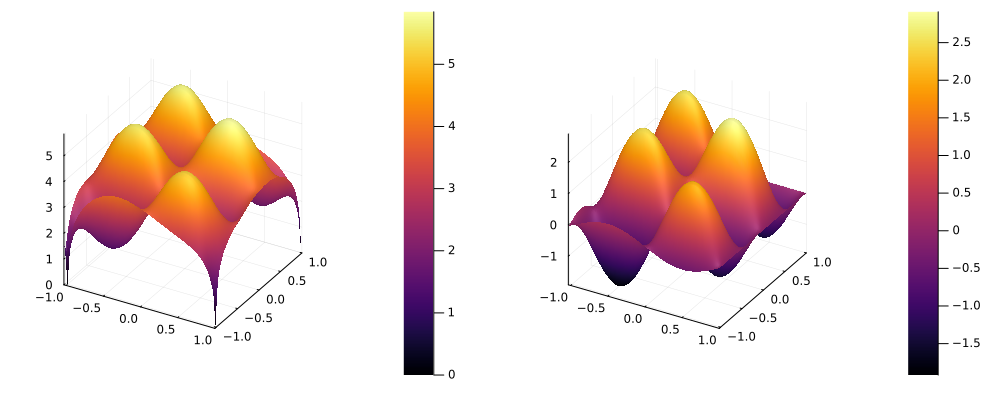

In [49]:
M = 64
P = M
domain = RectangularDomain(-1, 1, -1, 1)
alpha = 3.0

plot_case(M, P, alpha, test_f_1, domain, test_u_1)

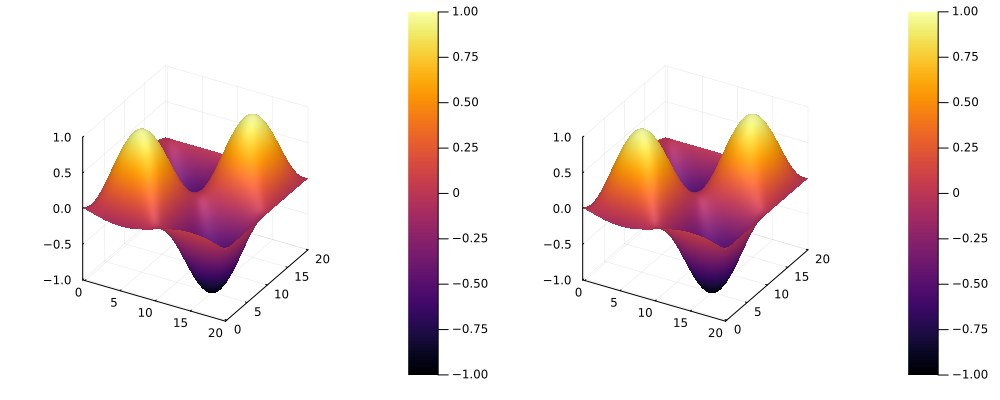

In [50]:
M = 64
P = M
domain = RectangularDomain(0, 20, 0, 20)
alpha = 0.0

plot_case(M, P, alpha, test_f_2, domain, test_u_2)

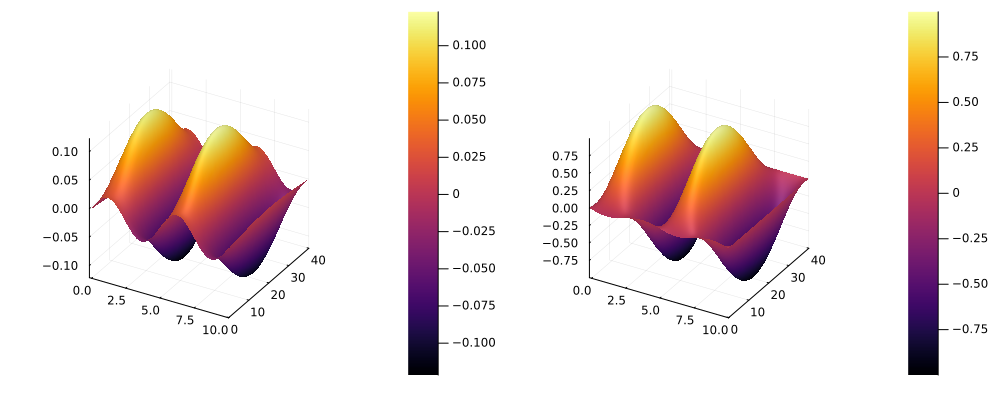

In [51]:
M = 64
P = M
domain = RectangularDomain(0, 10, 0, 40)
alpha = 0.0

plot_case(M, P, alpha, test_f_2, domain, test_u_2)